In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error



In [2]:
def parser(x):
    return pd.datetime.strptime('190'+x, '%Y-%m')

In [5]:
df = pd.read_csv('shampoo.csv',header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

C:\Users\GallaJ-\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [6]:
df.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

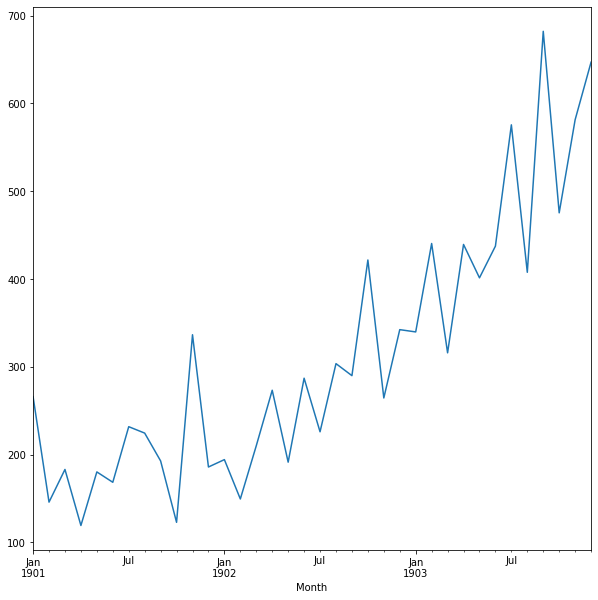

In [7]:
df.plot(figsize =(10,10))

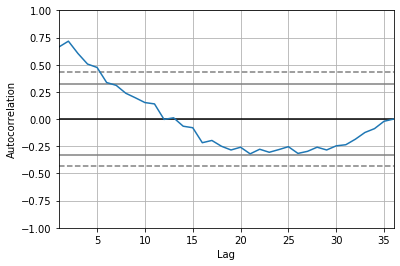

In [12]:
pd.plotting.autocorrelation_plot(df)
plt.show()

In [8]:
X = df.values

In [11]:
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [17]:
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print("Predicted = %f, Actual = %f" %(yhat,obs))



Predicted = 349.117734, Actual = 342.300000
Predicted = 306.513002, Actual = 339.700000
Predicted = 387.376436, Actual = 440.400000
Predicted = 348.154209, Actual = 315.900000
Predicted = 386.308798, Actual = 439.300000
Predicted = 356.082063, Actual = 401.300000
Predicted = 446.379484, Actual = 437.400000
Predicted = 394.737309, Actual = 575.500000
Predicted = 434.915469, Actual = 407.600000
Predicted = 507.923369, Actual = 682.000000
Predicted = 435.482710, Actual = 475.300000
Predicted = 652.743868, Actual = 581.300000
Predicted = 546.343505, Actual = 646.900000


In [20]:
error = mean_squared_error(test,predictions)
print(error)

6958.327831727841


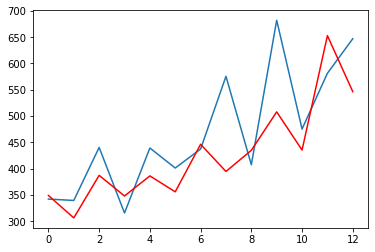

In [21]:
plt.plot(test)
plt.plot(predictions,color = 'red')
plt.show()